In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,fbeta_score
from sklearn.metrics import log_loss
from sklearn import metrics

from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTENC

from IPython.display import Image  
from six import StringIO  
import graphviz
import pydot 

In [4]:
ccdata = pd.read_csv('BankChurners.csv')
ccdata.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
#run once
ccdata.drop("CLIENTNUM",axis=1,inplace=True)
ccdata.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1,inplace=True)
ccdata.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1,inplace=True)

In [6]:
#run once
ccdata['Gender'].replace({'M':1,'F':0},inplace=True)
ccdata["Attrition_Flag"].replace({'Existing Customer':0,'Attrited Customer':1},inplace=True)

In [7]:
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [8]:
#run once
#drop_first = True to avoid structural multicollinearity
ccdata2 = pd.get_dummies(data=ccdata,columns=['Education_Level','Marital_Status',"Income_Category",'Card_Category'],drop_first=True)
ccdata2.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [9]:
ccdata2.drop(['Avg_Open_To_Buy','Customer_Age','Total_Trans_Ct','Months_on_book','Total_Amt_Chng_Q4_Q1'],axis=1,inplace=True)

In [10]:
def randforest_results(X_train,X_test,y_train,y_test):
    print('Random Forest Classifier Model Results\n')
    #post-optimization params
    model = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20,
                       n_estimators=20)
    #model = RandomForestClassifier()
    model.fit(X_train,y_train)
    rfcpreds = model.predict(X_test)
    print(classification_report(y_test,rfcpreds))
    print('Confusion Matrix\n',confusion_matrix(y_test,rfcpreds))
    plot_confusion_matrix(model,X_test,y_test,normalize='true',cmap='bwr')
    plt.show()
    print('Accuracy Score',round(accuracy_score(y_test,rfcpreds)*100,2),'%')
    print('Recall:',round(recall_score(y_test,rfcpreds)*100,2),'%')
    print('Precision:',round(precision_score(y_test, rfcpreds)*100,2),'%')
    print('F2 Score:',round(fbeta_score(y_test, rfcpreds, beta=2.0)*100,2),'%\n')
    print('The Training Accuracy is :',model.score(X_train,y_train))
    print('The Testing Accuracy is :', model.score(X_test,y_test))
    #running log loss on training data
    pred_proba = model.predict_proba(X_train)
    print('The log loss on training data is ',log_loss(y_train,pred_proba))
    #running log loss on testing data
    pred_proba_t = model.predict_proba(X_test)
    print('The log loss on testing data is ',log_loss(y_test,pred_proba_t),'\n')    
    df = pd.DataFrame({"Feature_names":X_train.columns,'Importances':model.feature_importances_})
    df1 = df.sort_values(by='Importances',ascending=False).reset_index()
    print(df1,'\n')
    df2 = df1[:15].sort_values(by='Importances',ascending=False)
    #plt.figure(figsize=(6,6))
    #plt.barh(df2['Feature_names'],df2['Importances'])
    #plt.show()
    #plt.tight_layout()
    #print('\n')
    
    df2['cumsum'] =  df2['Importances'].cumsum(axis=0)
    df2 = df2.set_index("Feature_names")
    
    plt.figure(figsize=(6,6))
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
    fig.suptitle("Features Importance", fontsize=15)
    ax[0].title.set_text('variables')
    df2[["Importances"]].sort_values(by="Importances").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
    ax[0].set(ylabel="")
    ax[1].title.set_text('cumulative')
    
    df2[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
    ax[1].set(xlabel="", xticks=np.arange(len(df2)), 
          xticklabels=df2.index)
    plt.xticks(rotation=70)
    plt.grid(axis='both')
    plt.show()
    plt.tight_layout()

In [11]:
X = ccdata2.drop("Attrition_Flag",axis=1)
y = ccdata2['Attrition_Flag']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

## Hyperparameter Optimization

In [216]:
r_randforest = RandomForestClassifier()

In [217]:
from sklearn.model_selection import GridSearchCV

In [218]:
#round 1
randforparam_grid = [
    {
        'criterion':['gini','entropy'],
        'n_estimators':[1,5,10,20,50,100],
        'max_depth':[5,10,15,20,25],
        'min_samples_leaf':[30,40,50,60]
    }
]

#round 2
randforparam_grid2 = [
    {
        'criterion':['gini','entropy'],
        'n_estimators':[20,50,60,70,80,90,100],
        'max_depth':[5,10,15,20,25],
        'min_samples_leaf':[20,30,40,50]
    }
]

In [223]:
clf = GridSearchCV(r_randforest, param_grid = randforparam_grid2, cv = 5, verbose=True, n_jobs = -1)

In [224]:
best_clf = clf.fit(X_train,y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


In [221]:
rawresults = pd.DataFrame(best_clf.cv_results_)
#rawresults

In [225]:
best_clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20,
                       n_estimators=20)

In [226]:
best_clf.best_score_

0.9112588127443008

## Preliminary Testing (Pre-feature Selection)

Random Forest Classifier Model Results

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2551
           1       0.88      0.52      0.65       488

    accuracy                           0.91      3039
   macro avg       0.89      0.75      0.80      3039
weighted avg       0.91      0.91      0.90      3039

Confusion Matrix
 [[2515   36]
 [ 235  253]]


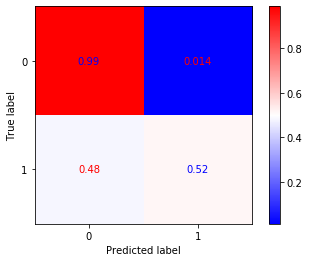

Accuracy Score 91.08 %
Recall: 51.84 %
Precision: 87.54 %
F2 Score: 56.45 %

The Training Accuracy is : 0.9211343115124153
The Testing Accuracy is : 0.9108259295820994
The log loss on training data is  0.19596803649584485
The log loss on testing data is  0.21335856279124849 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt     0.340427
1       6             Total_Revolving_Bal     0.219818
2       8             Total_Ct_Chng_Q4_Q1     0.148002
3       9           Avg_Utilization_Ratio     0.071444
4       2        Total_Relationship_Count     0.069558
5       5                    Credit_Limit     0.038246
6       4           Contacts_Count_12_mon     0.031747
7       3          Months_Inactive_12_mon     0.030900
8       1                 Dependent_count     0.012143
9       0                          Gender     0.009918
10     16          Marital_Status_Married     0.005050
11     17           Marital_Status_Single     0.004379
12     2

<Figure size 432x432 with 0 Axes>

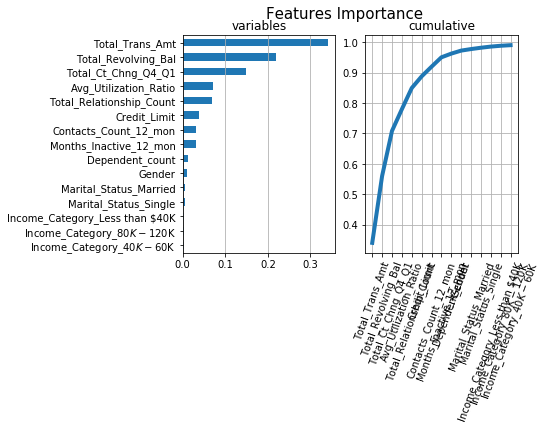

<Figure size 432x288 with 0 Axes>

In [15]:
#post-optimization results
randforest_results(X_train,X_test,y_train,y_test)

In [16]:
#SMOTENC uses k-nearest neighbour algo to create synthetic samples 
#"Note - SMOTENC takes into consideration categorical and continuous variables"
from imblearn.over_sampling import SMOTE

#X= ccdata2.drop('Attrition_Flag',axis='columns')
#y= ccdata2['Attrition_Flag']
smote = SMOTE(sampling_strategy='minority') 
#samplingstrat specifies whether to use the minority or majority value for under/over-sampling
X_sm, y_sm = smote.fit_resample(X_train,y_train)

y_sm.value_counts()
#generate train test split first then do resampling only on training set

1    5949
0    5949
Name: Attrition_Flag, dtype: int64

Random Forest Classifier Model Results

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2551
           1       0.68      0.78      0.73       488

    accuracy                           0.91      3039
   macro avg       0.82      0.86      0.84      3039
weighted avg       0.91      0.91      0.91      3039

Confusion Matrix
 [[2373  178]
 [ 105  383]]


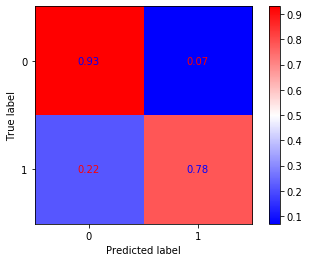

Accuracy Score 90.69 %
Recall: 78.48 %
Precision: 68.27 %
F2 Score: 76.2 %

The Training Accuracy is : 0.9393175323583796
The Testing Accuracy is : 0.9068772622573215
The log loss on training data is  0.22345031509458452
The log loss on testing data is  0.28211092368411933 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt     0.283854
1       6             Total_Revolving_Bal     0.183850
2       8             Total_Ct_Chng_Q4_Q1     0.138862
3       2        Total_Relationship_Count     0.081538
4       9           Avg_Utilization_Ratio     0.061177
5       5                    Credit_Limit     0.037686
6      16          Marital_Status_Married     0.034446
7       0                          Gender     0.024968
8      11        Education_Level_Graduate     0.024493
9      17           Marital_Status_Single     0.024237
10      3          Months_Inactive_12_mon     0.022314
11      4           Contacts_Count_12_mon     0.015336
12     12

<Figure size 432x432 with 0 Axes>

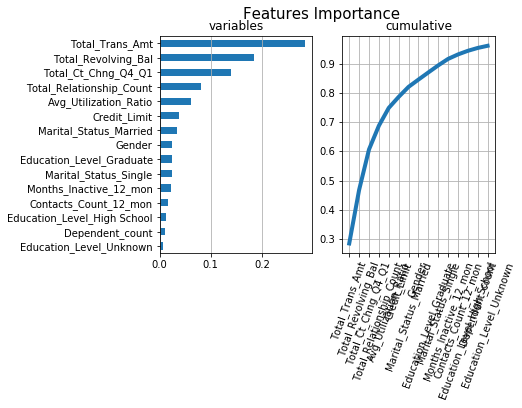

<Figure size 432x288 with 0 Axes>

In [17]:
randforest_results(X_sm,X_test,y_sm,y_test)

In [18]:
##### With Pipeline Step resampling #####
over = BorderlineSMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under)]

pipeline = Pipeline(steps=steps)
X_train3, y_train3 = pipeline.fit_resample(X_train,y_train)
y_train3.value_counts()

0    3965
1    2379
Name: Attrition_Flag, dtype: int64

Random Forest Classifier Model Results

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2551
           1       0.71      0.80      0.75       488

    accuracy                           0.92      3039
   macro avg       0.84      0.87      0.85      3039
weighted avg       0.92      0.92      0.92      3039

Confusion Matrix
 [[2395  156]
 [  98  390]]


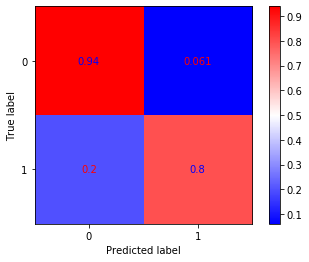

Accuracy Score 91.64 %
Recall: 79.92 %
Precision: 71.43 %
F2 Score: 78.06 %

The Training Accuracy is : 0.919609079445145
The Testing Accuracy is : 0.916419874958868
The log loss on training data is  0.26516779422948306
The log loss on testing data is  0.2609160353289501 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt     0.346149
1       8             Total_Ct_Chng_Q4_Q1     0.156294
2       6             Total_Revolving_Bal     0.126600
3       2        Total_Relationship_Count     0.085505
4       9           Avg_Utilization_Ratio     0.066152
5       5                    Credit_Limit     0.053848
6       3          Months_Inactive_12_mon     0.030673
7       0                          Gender     0.028328
8       4           Contacts_Count_12_mon     0.021742
9      16          Marital_Status_Married     0.012883
10      1                 Dependent_count     0.008716
11     11        Education_Level_Graduate     0.008715
12     23  

<Figure size 432x432 with 0 Axes>

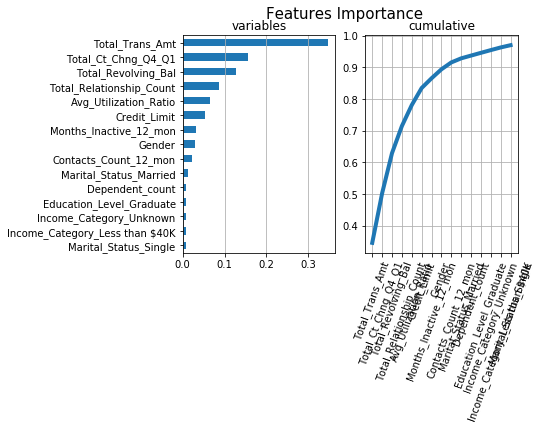

<Figure size 432x288 with 0 Axes>

In [19]:
randforest_results(X_train3,X_test,y_train3,y_test)

## Post-feature selection

In [20]:
#feature selection
X_train2 = X_train.drop(['Card_Category_Silver','Card_Category_Platinum','Card_Category_Gold','Education_Level_Post-Graduate','Marital_Status_Unknown','Income_Category_$60K - $80K','Education_Level_Unknown','Education_Level_Doctorate','Education_Level_Uneducated'],axis=1)
X_test2 = X_test.drop(['Card_Category_Silver','Card_Category_Platinum','Card_Category_Gold','Education_Level_Post-Graduate','Marital_Status_Unknown','Income_Category_$60K - $80K','Education_Level_Unknown','Education_Level_Doctorate','Education_Level_Uneducated'],axis=1)

Random Forest Classifier Model Results

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2551
           1       0.83      0.58      0.68       488

    accuracy                           0.91      3039
   macro avg       0.88      0.78      0.82      3039
weighted avg       0.91      0.91      0.91      3039

Confusion Matrix
 [[2495   56]
 [ 207  281]]


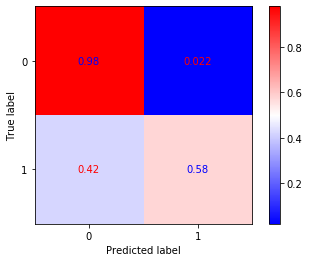

Accuracy Score 91.35 %
Recall: 57.58 %
Precision: 83.38 %
F2 Score: 61.38 %

The Training Accuracy is : 0.9281884875846501
The Testing Accuracy is : 0.9134583744652847
The log loss on training data is  0.18359467150695466
The log loss on testing data is  0.20383200388948186 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt     0.343697
1       6             Total_Revolving_Bal     0.146067
2       8             Total_Ct_Chng_Q4_Q1     0.136892
3       9           Avg_Utilization_Ratio     0.134342
4       2        Total_Relationship_Count     0.083510
5       5                    Credit_Limit     0.049343
6       3          Months_Inactive_12_mon     0.038333
7       4           Contacts_Count_12_mon     0.023236
8       0                          Gender     0.015426
9       1                 Dependent_count     0.010847
10     12          Marital_Status_Married     0.004212
11     15    Income_Category_$80K - $120K     0.003843
12     1

<Figure size 432x432 with 0 Axes>

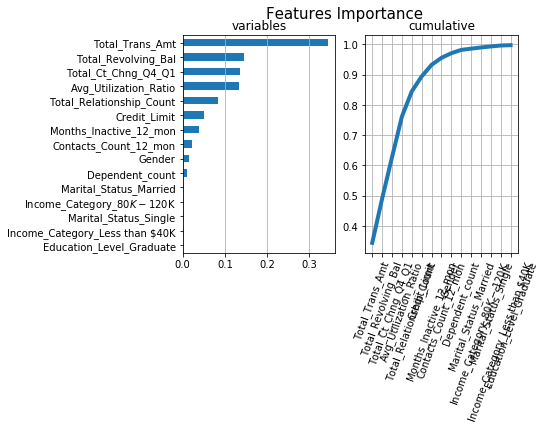

<Figure size 432x288 with 0 Axes>

In [21]:
#non-resampled results
randforest_results(X_train2,X_test2,y_train,y_test)

In [22]:
#SMOTENC uses k-nearest neighbour algo to create synthetic samples 
#"Note - SMOTENC takes into consideration categorical and continuous variables"
from imblearn.over_sampling import SMOTE

#X= ccdata2.drop('Attrition_Flag',axis='columns')
#y= ccdata2['Attrition_Flag']
smote = SMOTE(sampling_strategy='minority') 
#samplingstrat specifies whether to use the minority or majority value for under/over-sampling
X_sm2, y_sm2 = smote.fit_resample(X_train2,y_train)

y_sm2.value_counts()
#generate train test split first then do resampling only on training set

1    5949
0    5949
Name: Attrition_Flag, dtype: int64

Random Forest Classifier Model Results

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2551
           1       0.68      0.81      0.74       488

    accuracy                           0.91      3039
   macro avg       0.82      0.87      0.84      3039
weighted avg       0.92      0.91      0.91      3039

Confusion Matrix
 [[2364  187]
 [  92  396]]


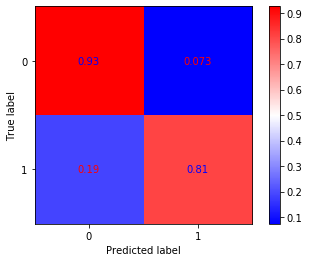

Accuracy Score 90.82 %
Recall: 81.15 %
Precision: 67.92 %
F2 Score: 78.11 %

The Training Accuracy is : 0.9394015800974954
The Testing Accuracy is : 0.9081934846989141
The log loss on training data is  0.2095934136375985
The log loss on testing data is  0.2677261429419916 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt     0.326265
1       6             Total_Revolving_Bal     0.165756
2       8             Total_Ct_Chng_Q4_Q1     0.137490
3       2        Total_Relationship_Count     0.085929
4       9           Avg_Utilization_Ratio     0.071933
5       5                    Credit_Limit     0.038190
6       0                          Gender     0.033832
7      12          Marital_Status_Married     0.024309
8      13           Marital_Status_Single     0.019449
9       3          Months_Inactive_12_mon     0.016938
10     10        Education_Level_Graduate     0.016505
11      4           Contacts_Count_12_mon     0.011656
12     16 

<Figure size 432x432 with 0 Axes>

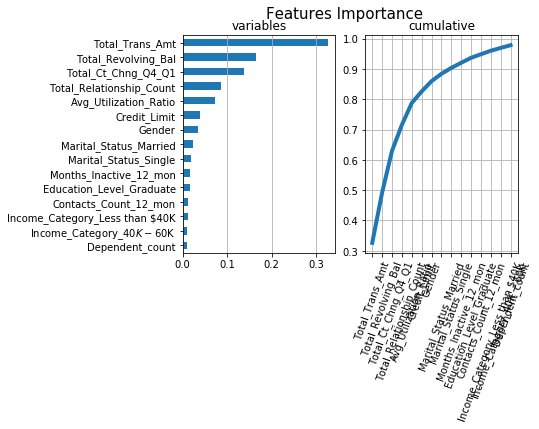

<Figure size 432x288 with 0 Axes>

In [23]:
randforest_results(X_sm2,X_test2,y_sm2,y_test)

In [26]:
##### With Pipeline Step resampling #####
over = BorderlineSMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under)]

pipeline = Pipeline(steps=steps)
X_train4, y_train4 = pipeline.fit_resample(X_train2,y_train)
y_train4.value_counts()

0    3965
1    2379
Name: Attrition_Flag, dtype: int64

Random Forest Classifier Model Results

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2551
           1       0.72      0.82      0.76       488

    accuracy                           0.92      3039
   macro avg       0.84      0.88      0.86      3039
weighted avg       0.92      0.92      0.92      3039

Confusion Matrix
 [[2393  158]
 [  90  398]]


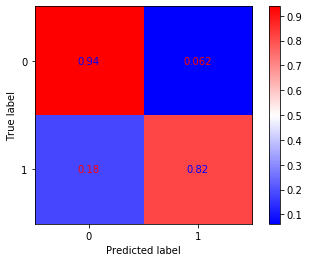

Accuracy Score 91.84 %
Recall: 81.56 %
Precision: 71.58 %
F2 Score: 79.35 %

The Training Accuracy is : 0.9222887767969735
The Testing Accuracy is : 0.918394208621257
The log loss on training data is  0.25805810745741314
The log loss on testing data is  0.2555382022385555 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt     0.353961
1       8             Total_Ct_Chng_Q4_Q1     0.156531
2       6             Total_Revolving_Bal     0.121443
3       2        Total_Relationship_Count     0.083441
4       9           Avg_Utilization_Ratio     0.083424
5       5                    Credit_Limit     0.042733
6       3          Months_Inactive_12_mon     0.034421
7       4           Contacts_Count_12_mon     0.028581
8       0                          Gender     0.026320
9      12          Marital_Status_Married     0.018068
10     10        Education_Level_Graduate     0.011938
11     13           Marital_Status_Single     0.010260
12      1 

<Figure size 432x432 with 0 Axes>

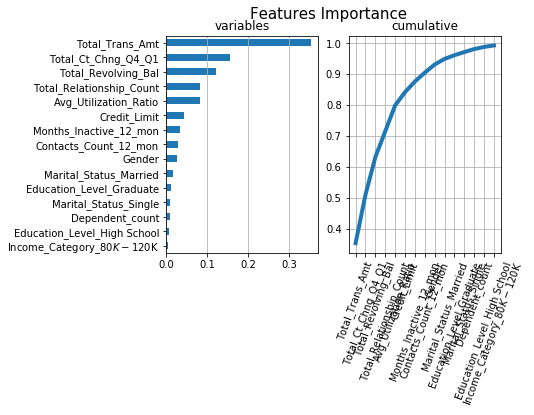

<Figure size 432x288 with 0 Axes>

In [27]:
randforest_results(X_train4,X_test2,y_train4,y_test)

In [26]:
y_test.value_counts()

0    2551
1     488
Name: Attrition_Flag, dtype: int64

## Class weight rebalancing (Pre-feature selection)

In [31]:
def weighted_randforest_results(X_train,X_test,y_train,y_test):
    print('Random Forest Classifier Model Results\n')
    #post-optimization params
    model = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20,
                       n_estimators=20, class_weight = 'balanced')
    model.fit(X_train,y_train)
    rfcpreds = model.predict(X_test)
    print(classification_report(y_test,rfcpreds))
    print('Confusion Matrix\n',confusion_matrix(y_test,rfcpreds))
    plot_confusion_matrix(model,X_test,y_test,normalize='true',cmap='bwr')
    plt.show()
    print('Accuracy Score',round(accuracy_score(y_test,rfcpreds)*100,2),'%')
    print('Recall:',round(recall_score(y_test,rfcpreds)*100,2),'%')
    print('Precision:',round(precision_score(y_test, rfcpreds)*100,2),'%')
    print('F2 Score:',round(fbeta_score(y_test, rfcpreds, beta=2.0)*100,2),'%\n')
    print('The Training Accuracy is :',model.score(X_train,y_train))
    print('The Testing Accuracy is :', model.score(X_test,y_test))
    #running log loss on training data
    pred_proba = model.predict_proba(X_train)
    print('The log loss on training data is ',log_loss(y_train,pred_proba))
    #running log loss on testing data
    pred_proba_t = model.predict_proba(X_test)
    print('The log loss on testing data is ',log_loss(y_test,pred_proba_t),'\n')    
    df = pd.DataFrame({"Feature_names":X_train.columns,'Importances':model.feature_importances_})
    df1 = df.sort_values(by='Importances',ascending=False).reset_index()
    print(df1,'\n')
    df2 = df1[:15].sort_values(by='Importances',ascending=False)
    #plt.figure(figsize=(6,6))
    #plt.barh(df2['Feature_names'],df2['Importances'])
    #plt.show()
    #plt.tight_layout()
    #print('\n')
    
    df2['cumsum'] =  df2['Importances'].cumsum(axis=0)
    df2 = df2.set_index("Feature_names")
    
    plt.figure(figsize=(6,6))
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
    fig.suptitle("Features Importance", fontsize=15)
    ax[0].title.set_text('variables')
    df2[["Importances"]].sort_values(by="Importances").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
    ax[0].set(ylabel="")
    ax[1].title.set_text('cumulative')
    
    df2[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
    ax[1].set(xlabel="", xticks=np.arange(len(df2)), 
          xticklabels=df2.index)
    plt.xticks(rotation=70)
    plt.grid(axis='both')
    plt.show()
    plt.tight_layout()

Random Forest Classifier Model Results

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2551
           1       0.64      0.88      0.74       488

    accuracy                           0.90      3039
   macro avg       0.81      0.89      0.84      3039
weighted avg       0.92      0.90      0.91      3039

Confusion Matrix
 [[2312  239]
 [  57  431]]


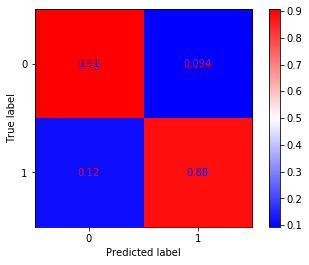

Accuracy Score 90.26 %
Recall: 88.32 %
Precision: 64.33 %
F2 Score: 82.19 %

The Training Accuracy is : 0.9159142212189616
The Testing Accuracy is : 0.9025995393221454
The log loss on training data is  0.2648834404726139
The log loss on testing data is  0.28656144597940647 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt     0.343730
1       6             Total_Revolving_Bal     0.210421
2       8             Total_Ct_Chng_Q4_Q1     0.148639
3       2        Total_Relationship_Count     0.062585
4       9           Avg_Utilization_Ratio     0.058931
5       5                    Credit_Limit     0.047015
6       4           Contacts_Count_12_mon     0.038090
7       3          Months_Inactive_12_mon     0.037834
8       1                 Dependent_count     0.013873
9       0                          Gender     0.010582
10     21    Income_Category_$80K - $120K     0.004971
11     16          Marital_Status_Married     0.003868
12     22

<Figure size 432x432 with 0 Axes>

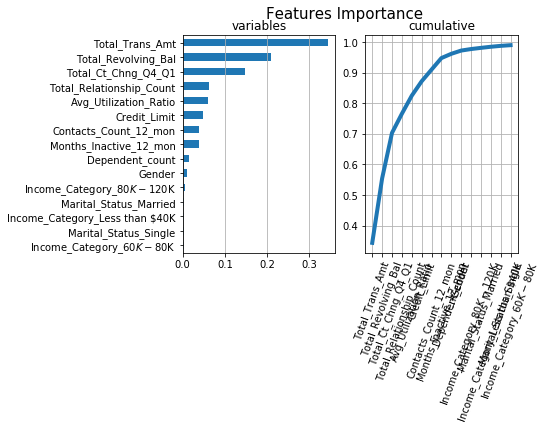

<Figure size 432x288 with 0 Axes>

In [32]:
weighted_randforest_results(X_train,X_test,y_train,y_test)

Random Forest Classifier Model Results

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2551
           1       0.69      0.77      0.73       488

    accuracy                           0.91      3039
   macro avg       0.82      0.85      0.84      3039
weighted avg       0.91      0.91      0.91      3039

Confusion Matrix
 [[2384  167]
 [ 113  375]]


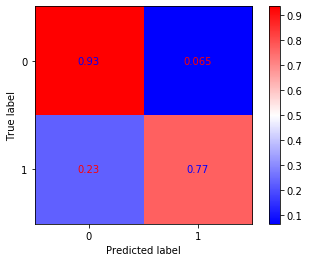

Accuracy Score 90.79 %
Recall: 76.84 %
Precision: 69.19 %
F2 Score: 75.18 %

The Training Accuracy is : 0.9409144394015801
The Testing Accuracy is : 0.907864429088516
The log loss on training data is  0.22014146908034954
The log loss on testing data is  0.27765462079111586 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt     0.337937
1       6             Total_Revolving_Bal     0.144940
2       8             Total_Ct_Chng_Q4_Q1     0.095611
3       9           Avg_Utilization_Ratio     0.082578
4       2        Total_Relationship_Count     0.079429
5       5                    Credit_Limit     0.038601
6      16          Marital_Status_Married     0.031871
7       0                          Gender     0.028255
8       3          Months_Inactive_12_mon     0.023484
9      17           Marital_Status_Single     0.018539
10     12     Education_Level_High School     0.015051
11     11        Education_Level_Graduate     0.015012
12      4

<Figure size 432x432 with 0 Axes>

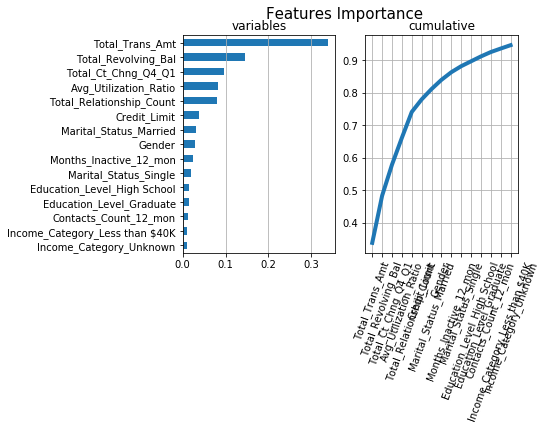

<Figure size 432x288 with 0 Axes>

In [33]:
weighted_randforest_results(X_sm,X_test,y_sm,y_test)

Random Forest Classifier Model Results

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2551
           1       0.61      0.84      0.71       488

    accuracy                           0.89      3039
   macro avg       0.79      0.87      0.82      3039
weighted avg       0.91      0.89      0.90      3039

Confusion Matrix
 [[2292  259]
 [  76  412]]


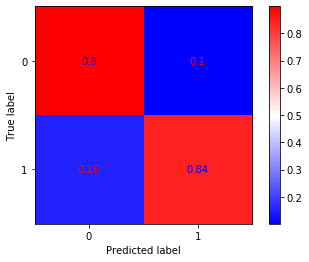

Accuracy Score 88.98 %
Recall: 84.43 %
Precision: 61.4 %
F2 Score: 78.54 %

The Training Accuracy is : 0.9202395964691047
The Testing Accuracy is : 0.8897663705166173
The log loss on training data is  0.2806453971098514
The log loss on testing data is  0.31362199117921474 

    index                   Feature_names   Importances
0       7                 Total_Trans_Amt  3.868410e-01
1       8             Total_Ct_Chng_Q4_Q1  1.357120e-01
2       6             Total_Revolving_Bal  9.749562e-02
3       9           Avg_Utilization_Ratio  8.080590e-02
4       2        Total_Relationship_Count  7.503431e-02
5       5                    Credit_Limit  5.103089e-02
6       3          Months_Inactive_12_mon  3.413100e-02
7       4           Contacts_Count_12_mon  2.257048e-02
8       0                          Gender  2.215092e-02
9      16          Marital_Status_Married  1.699975e-02
10      1                 Dependent_count  1.398271e-02
11     11        Education_Level_Graduate  1.297457e-

<Figure size 432x432 with 0 Axes>

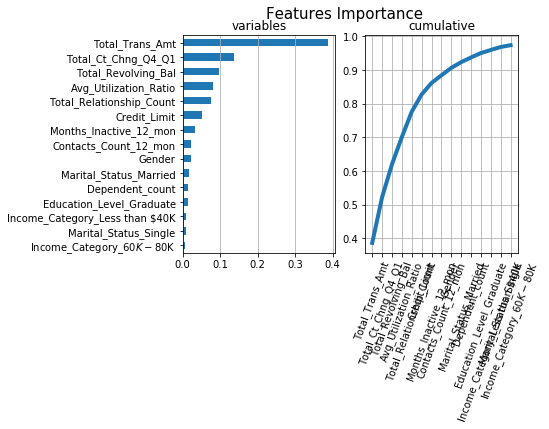

<Figure size 432x288 with 0 Axes>

In [34]:
weighted_randforest_results(X_train3,X_test,y_train3,y_test)

## Class weight rebalancing (Post-feature selection)

Random Forest Classifier Model Results

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      2551
           1       0.67      0.87      0.76       488

    accuracy                           0.91      3039
   macro avg       0.82      0.89      0.85      3039
weighted avg       0.93      0.91      0.92      3039

Confusion Matrix
 [[2343  208]
 [  63  425]]


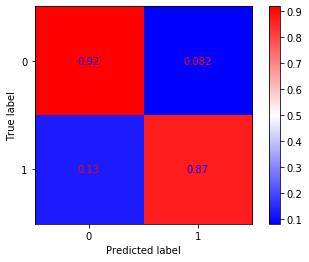

Accuracy Score 91.08 %
Recall: 87.09 %
Precision: 67.14 %
F2 Score: 82.21 %

The Training Accuracy is : 0.9193002257336343
The Testing Accuracy is : 0.9108259295820994
The log loss on training data is  0.26225917836533785
The log loss on testing data is  0.28227702565752505 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt     0.304531
1       6             Total_Revolving_Bal     0.227715
2       8             Total_Ct_Chng_Q4_Q1     0.169643
3       9           Avg_Utilization_Ratio     0.071707
4       2        Total_Relationship_Count     0.053434
5       5                    Credit_Limit     0.051542
6       3          Months_Inactive_12_mon     0.041233
7       4           Contacts_Count_12_mon     0.035772
8       1                 Dependent_count     0.010580
9       0                          Gender     0.009583
10     12          Marital_Status_Married     0.005059
11     15    Income_Category_$80K - $120K     0.004134
12     1

<Figure size 432x432 with 0 Axes>

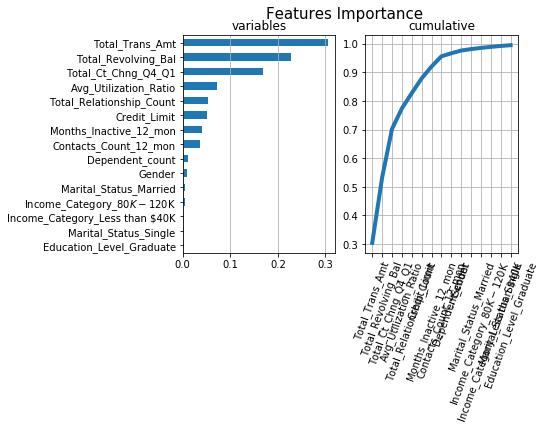

<Figure size 432x288 with 0 Axes>

In [35]:
weighted_randforest_results(X_train2,X_test2,y_train,y_test)

Random Forest Classifier Model Results

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2551
           1       0.69      0.80      0.74       488

    accuracy                           0.91      3039
   macro avg       0.82      0.86      0.84      3039
weighted avg       0.92      0.91      0.91      3039

Confusion Matrix
 [[2376  175]
 [ 100  388]]


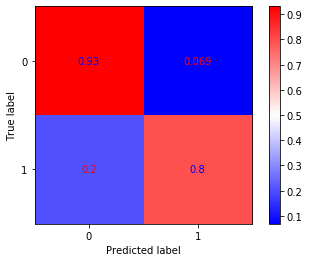

Accuracy Score 90.95 %
Recall: 79.51 %
Precision: 68.92 %
F2 Score: 77.14 %

The Training Accuracy is : 0.9416708690536224
The Testing Accuracy is : 0.9095097071405067
The log loss on training data is  0.21368070593125088
The log loss on testing data is  0.27010455056298754 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt     0.305030
1       6             Total_Revolving_Bal     0.171412
2       8             Total_Ct_Chng_Q4_Q1     0.136202
3       9           Avg_Utilization_Ratio     0.082362
4       2        Total_Relationship_Count     0.073302
5       5                    Credit_Limit     0.039306
6       0                          Gender     0.028417
7      12          Marital_Status_Married     0.027502
8       3          Months_Inactive_12_mon     0.022380
9      13           Marital_Status_Single     0.020136
10     10        Education_Level_Graduate     0.017700
11     14     Income_Category_$40K - $60K     0.014155
12      

<Figure size 432x432 with 0 Axes>

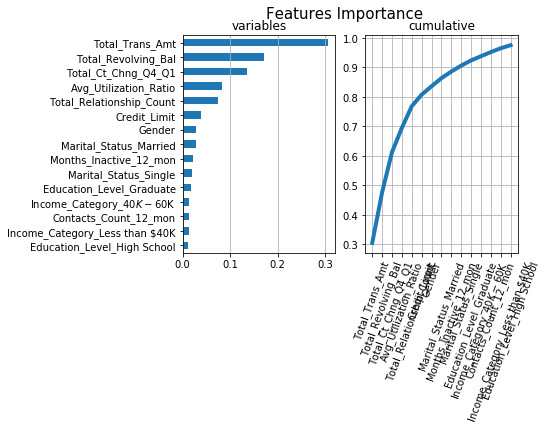

<Figure size 432x288 with 0 Axes>

In [36]:
weighted_randforest_results(X_sm2,X_test2,y_sm2,y_test)

Random Forest Classifier Model Results

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      2551
           1       0.64      0.85      0.73       488

    accuracy                           0.90      3039
   macro avg       0.81      0.88      0.84      3039
weighted avg       0.92      0.90      0.91      3039

Confusion Matrix
 [[2321  230]
 [  73  415]]


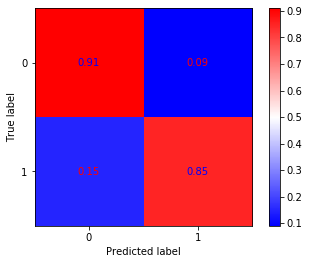

Accuracy Score 90.03 %
Recall: 85.04 %
Precision: 64.34 %
F2 Score: 79.9 %

The Training Accuracy is : 0.9222887767969735
The Testing Accuracy is : 0.9002961500493584
The log loss on training data is  0.2657885696312674
The log loss on testing data is  0.29831031049070733 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt     0.321457
1       8             Total_Ct_Chng_Q4_Q1     0.175229
2       6             Total_Revolving_Bal     0.137606
3       2        Total_Relationship_Count     0.089498
4       9           Avg_Utilization_Ratio     0.081482
5       5                    Credit_Limit     0.040563
6       3          Months_Inactive_12_mon     0.034967
7       0                          Gender     0.021124
8      12          Marital_Status_Married     0.020006
9       4           Contacts_Count_12_mon     0.019437
10     13           Marital_Status_Single     0.014333
11      1                 Dependent_count     0.009255
12     10 

<Figure size 432x432 with 0 Axes>

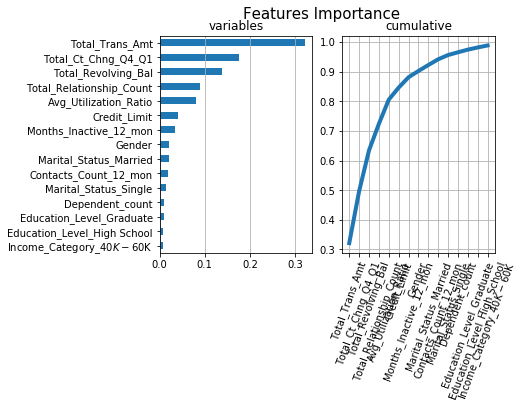

<Figure size 432x288 with 0 Axes>

In [37]:
weighted_randforest_results(X_train4,X_test2,y_train4,y_test)